In [47]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, accuracy_score, confusion_matrix, classification_report

In [2]:
vgg16 = load_model('vgg.h5')

for layers in vgg16.layers:
    layers.trainable = False

vgg = Sequential()

vgg.add(vgg16)
vgg.add(Dense(256))
vgg.add(Flatten())

vgg.add(Dense(128))
vgg.add(LeakyReLU())
vgg.add(Dropout(0.3))
vgg.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

vgg.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])    

In [3]:
data_folder = 'brain_tumor_final//'

train_dir = data_folder + "train//"
val_dir = data_folder + "val//"
test_dir = data_folder + "test//"

data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (357, 328),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'rgb',
                                            class_mode = 'binary')

val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (357, 328),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (357, 328),
                                      batch_size = 1,
                                      shuffle = False,
                                      color_mode = 'rgb',
                                      class_mode = 'binary')

Found 2277 images belonging to 2 classes.
Found 488 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [4]:
stop = EarlyStopping(patience = 10, monitor = 'val_loss')
history = vgg.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

Epoch 1/100
72/72 [==============================] - 117s 1s/step - loss: 0.8800 - accuracy: 0.6005 - val_loss: 0.3732 - val_accuracy: 0.8279
Epoch 2/100
72/72 [==============================] - 64s 890ms/step - loss: 0.4654 - accuracy: 0.7650 - val_loss: 0.2673 - val_accuracy: 0.8975
Epoch 3/100
72/72 [==============================] - 64s 882ms/step - loss: 0.4056 - accuracy: 0.8131 - val_loss: 0.1894 - val_accuracy: 0.9283
Epoch 4/100
72/72 [==============================] - 64s 886ms/step - loss: 0.2983 - accuracy: 0.8692 - val_loss: 0.3116 - val_accuracy: 0.8525
Epoch 5/100
72/72 [==============================] - 66s 913ms/step - loss: 0.3185 - accuracy: 0.8617 - val_loss: 0.1496 - val_accuracy: 0.9385
Epoch 6/100
72/72 [==============================] - 65s 901ms/step - loss: 0.2696 - accuracy: 0.8952 - val_loss: 0.1361 - val_accuracy: 0.9508
Epoch 7/100
72/72 [==============================] - 72s 994ms/step - loss: 0.2060 - accuracy: 0.9164 - val_loss: 0.1451 - val_accuracy: 0

In [7]:
inception = load_model('inception.h5')

for layers in inception.layers:
    layers.trainable = False
inc = Sequential()

inc.add(inception)
inc.add(Dense(256))
inc.add(Flatten())

inc.add(Dense(128))
inc.add(LeakyReLU())
inc.add(Dropout(0.3))
inc.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

inc.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

inception_history =  inc.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

Epoch 1/100
72/72 [==============================] - 80s 973ms/step - loss: 0.5237 - accuracy: 0.7207 - val_loss: 0.1627 - val_accuracy: 0.9447
Epoch 2/100
72/72 [==============================] - 65s 903ms/step - loss: 0.2235 - accuracy: 0.9093 - val_loss: 0.1604 - val_accuracy: 0.9426
Epoch 3/100
72/72 [==============================] - 60s 827ms/step - loss: 0.1668 - accuracy: 0.9309 - val_loss: 0.1010 - val_accuracy: 0.9590
Epoch 4/100
72/72 [==============================] - 59s 820ms/step - loss: 0.1311 - accuracy: 0.9459 - val_loss: 0.1341 - val_accuracy: 0.9570
Epoch 5/100
72/72 [==============================] - 60s 834ms/step - loss: 0.1366 - accuracy: 0.9485 - val_loss: 0.0906 - val_accuracy: 0.9672
Epoch 6/100
72/72 [==============================] - 59s 816ms/step - loss: 0.1083 - accuracy: 0.9590 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 7/100
72/72 [==============================] - 62s 865ms/step - loss: 0.0887 - accuracy: 0.9638 - val_loss: 0.0636 - val_accuracy:

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3), input_shape = (357,328,3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 64, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 128, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters = 256, kernel_size=3))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(units=256))
model.add(LeakyReLU())
model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.0001, decay=1e-5)

model.compile(optimizer = optimizer, 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])
history = model.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = True, callbacks=[stop])

save_model(model,'tumor_model.h5')

Epoch 1/100
72/72 [==============================] - 65s 835ms/step - loss: 0.6645 - accuracy: 0.6180 - val_loss: 0.4653 - val_accuracy: 0.7602
Epoch 2/100
72/72 [==============================] - 60s 827ms/step - loss: 0.5380 - accuracy: 0.7132 - val_loss: 0.5307 - val_accuracy: 0.7807
Epoch 3/100
72/72 [==============================] - 57s 785ms/step - loss: 0.4652 - accuracy: 0.7829 - val_loss: 0.4042 - val_accuracy: 0.8197
Epoch 4/100
72/72 [==============================] - 65s 903ms/step - loss: 0.4900 - accuracy: 0.7672 - val_loss: 0.4112 - val_accuracy: 0.8258
Epoch 5/100
72/72 [==============================] - 74s 1s/step - loss: 0.4598 - accuracy: 0.7627 - val_loss: 0.4477 - val_accuracy: 0.7971
Epoch 6/100
72/72 [==============================] - 56s 780ms/step - loss: 0.4222 - accuracy: 0.7954 - val_loss: 0.3957 - val_accuracy: 0.8176
Epoch 7/100
72/72 [==============================] - 55s 758ms/step - loss: 0.4033 - accuracy: 0.8074 - val_loss: 0.3784 - val_accuracy: 0.

In [10]:
labels = test_gen.labels 
vgg_preds = vgg.predict(test_gen)

In [14]:
vgg_preds = vgg_preds.round()

In [18]:
print("Accuracy of fine-tuned VGG model:", accuracy_score(labels, vgg_preds))

Accuracy of fine-tuned VGG model: 0.9754098360655737


In [19]:
inception_preds = inc.predict(test_gen).round()
print("Accuracy of fine-tuned inception model:", accuracy_score(labels, inception_preds))

Accuracy of fine-tuned inception model: 0.9836065573770492


In [25]:
model_preds = model.predict(test_gen).round()
print("Accuracy of our model: ", accuracy_score(labels,model_preds))

Accuracy of our model:  0.9713114754098361


In [28]:
print("Classification report for fine-tuned VGG-16: ")
print(classification_report(labels, vgg_preds))

Classification report for fine-tuned VGG-16: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       239
           1       0.99      0.96      0.98       249

    accuracy                           0.98       488
   macro avg       0.98      0.98      0.98       488
weighted avg       0.98      0.98      0.98       488



In [29]:
print("Classification report for fine-tuned InceptionV3: ")
print(classification_report(labels, inception_preds))

Classification report for fine-tuned InceptionV3: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       239
           1       0.98      0.99      0.98       249

    accuracy                           0.98       488
   macro avg       0.98      0.98      0.98       488
weighted avg       0.98      0.98      0.98       488



In [30]:
print("Classification report for our model: ")
print(classification_report(labels, model_preds))

Classification report for our model: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.98      0.96      0.97       249

    accuracy                           0.97       488
   macro avg       0.97      0.97      0.97       488
weighted avg       0.97      0.97      0.97       488



(0.0, 2.0)

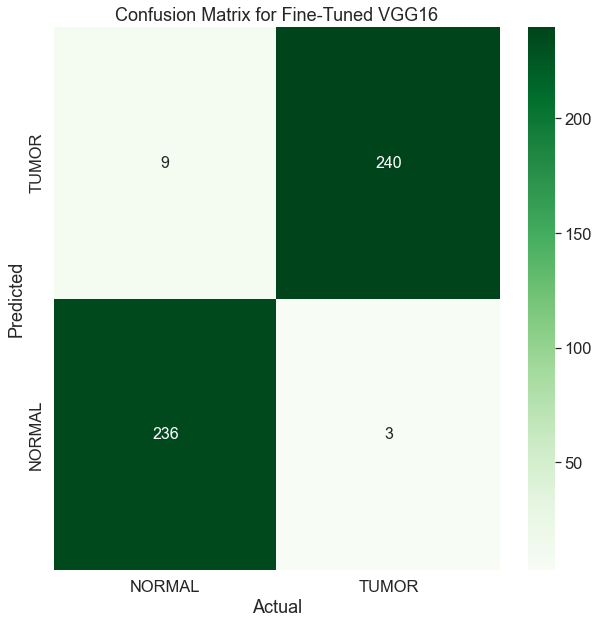

In [35]:
data = confusion_matrix(labels, vgg_preds)
df_cm = pd.DataFrame(data, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix for Fine-Tuned VGG16')
ax.xaxis.set_ticklabels(['NORMAL', 'TUMOR']); ax.yaxis.set_ticklabels(['NORMAL', 'TUMOR']);
ax.set_ylim([0,2])


(0.0, 2.0)

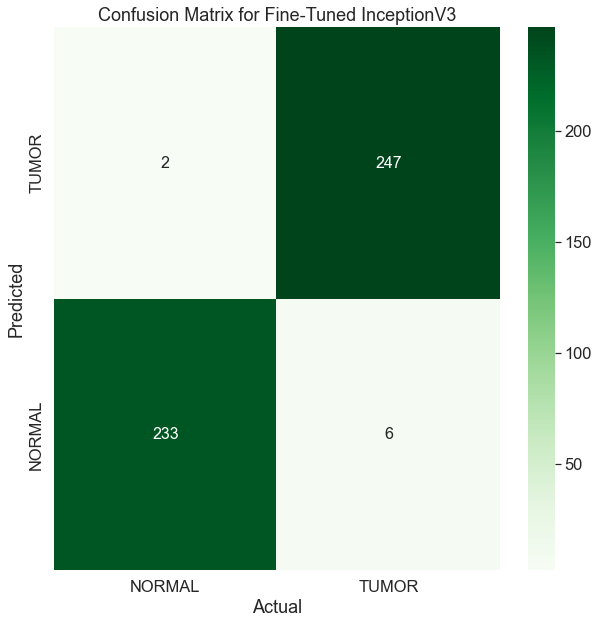

In [36]:
data = confusion_matrix(labels, inception_preds)
df_cm = pd.DataFrame(data, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix for Fine-Tuned InceptionV3')
ax.xaxis.set_ticklabels(['NORMAL', 'TUMOR']); ax.yaxis.set_ticklabels(['NORMAL', 'TUMOR']);
ax.set_ylim([0,2])


(0.0, 2.0)

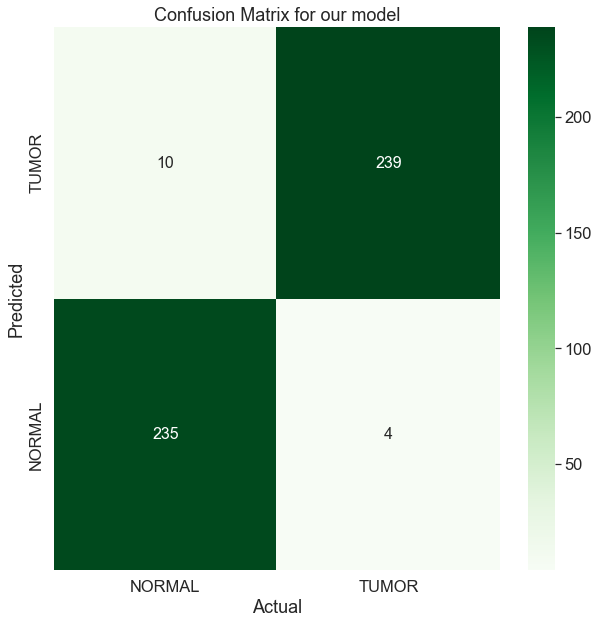

In [37]:
data = confusion_matrix(labels, model_preds)
df_cm = pd.DataFrame(data, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix for our model')
ax.xaxis.set_ticklabels(['NORMAL', 'TUMOR']); ax.yaxis.set_ticklabels(['NORMAL', 'TUMOR']);
ax.set_ylim([0,2])


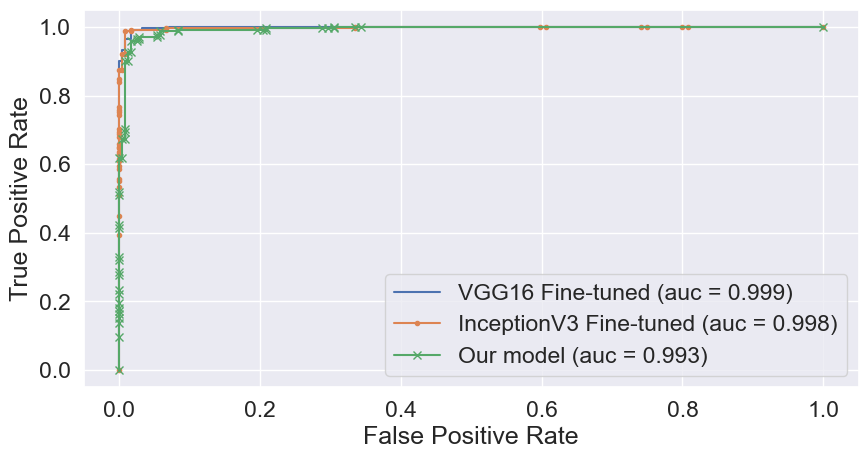

In [43]:
from sklearn.metrics import roc_curve, auc

vgg_fpr, vgg_tpr, threshold = roc_curve(labels, vgg.predict(test_gen))
auc_vgg = auc(vgg_fpr, vgg_tpr)

inception_fpr, inception_tpr, threshold = roc_curve(labels, inc.predict(test_gen))
auc_inception = auc(inception_fpr, inception_tpr)

model_fpr, model_tpr, threshold = roc_curve(labels, model.predict(test_gen))
auc_model = auc(model_fpr, model_tpr)

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(vgg_fpr, vgg_tpr, linestyle='-', label='VGG16 Fine-tuned (auc = %0.3f)' % auc_vgg)
plt.plot(inception_fpr, inception_tpr, marker='.', label='InceptionV3 Fine-tuned (auc = %0.3f)' % auc_inception)
plt.plot(model_fpr, model_tpr, marker ='x', label = 'Our model (auc = %0.3f)' % auc_model)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [102]:
from keras_visualizer import visualizer 

In [104]:
!pip install graphviz

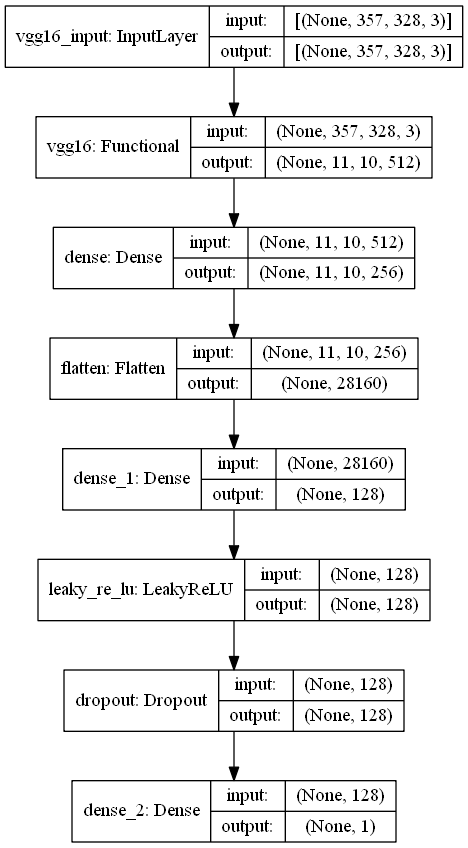

In [119]:
plot_model(vgg, show_shapes= True)

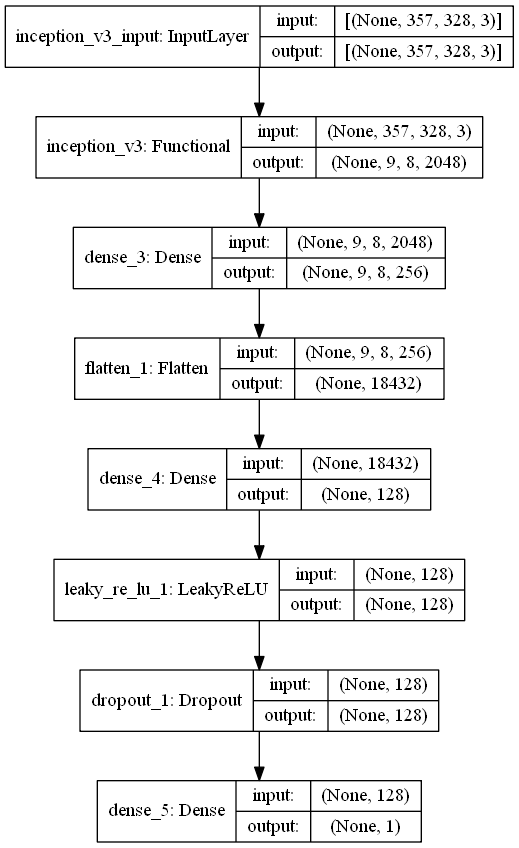

In [120]:
plot_model(inc, show_shapes = True)

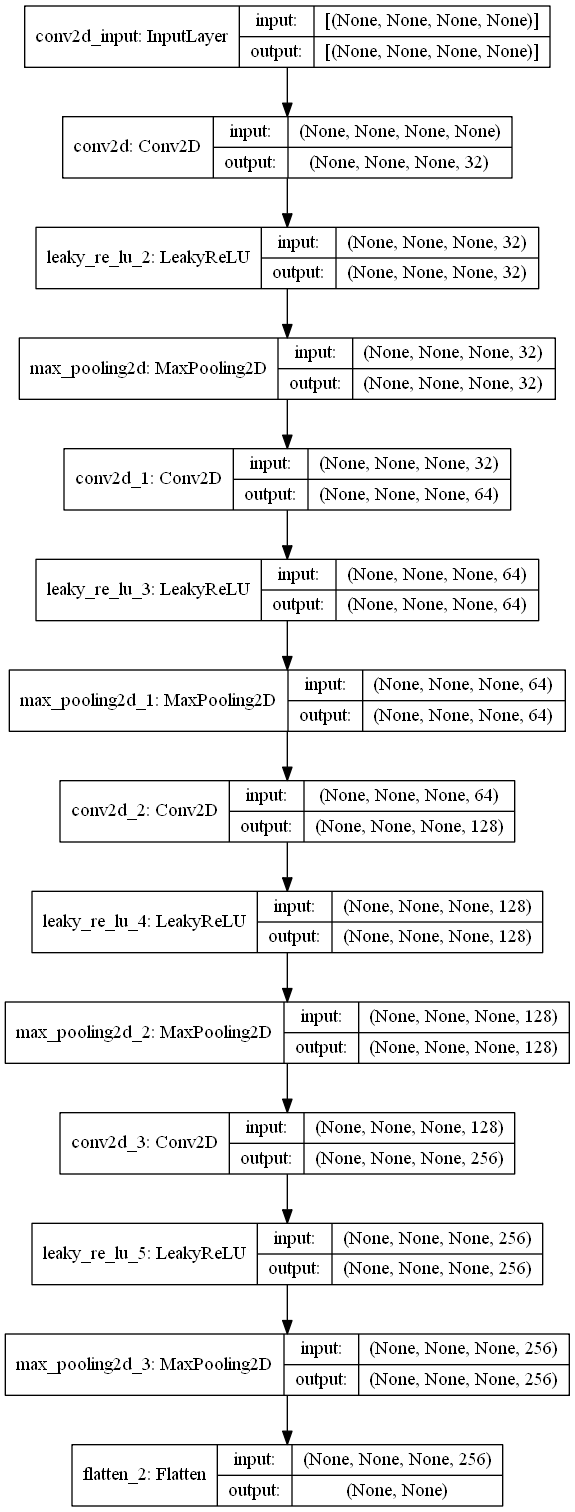

In [117]:
plot_model(model, show_shapes = True)